In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
datascience_path = 'trilha_datascience/tabela_alunos_datascience_atividades.csv'
gestao_path = 'trilha_gestao/tabela_alunos_gestao_atividades.csv'
design_path = 'trilha_design/tabela_alunos_design_atividades.csv'
devops_path = 'trilha_devops/tabela_alunos_devops_atividades.csv'
front_path = 'trilha_front/tabela_alunos_front_atividades.csv'
programacao_path = 'trilha_programacao/tabela_alunos_programacao_atividades.csv'

In [3]:
atividades_alunos_datascience = pd.read_csv(datascience_path).drop(columns={'Unnamed: 0'})
atividades_alunos_gestao = pd.read_csv(gestao_path).drop(columns={'Unnamed: 0'})
atividades_alunos_design = pd.read_csv(design_path).drop(columns={'Unnamed: 0'})
atividades_alunos_devops = pd.read_csv(devops_path).drop(columns={'Unnamed: 0'})
atividades_alunos_front = pd.read_csv(front_path).drop(columns={'Unnamed: 0'})
atividades_alunos_programacao = pd.read_csv(programacao_path).drop(columns={'Unnamed: 0'})

In [4]:
atividades_alunos_gestao.rename(columns={"Nome_Curso":"nome_curso",'Data_inicio_curso':'data_inicio_curso',
'Data_fim_curso':'data_fim_curso'},errors='raise',inplace=True)
atividades_alunos_datascience.rename(columns={"nome_Curso":"nome_curso"},errors='raise',inplace=True)
atividades_alunos_design.rename(columns={"Nome_Curso":"nome_curso",'Data_inicio_curso':'data_inicio_curso',
'Data_fim_curso':'data_fim_curso'},errors='raise',inplace=True)
atividades_alunos_devops.rename(columns={"Nome_Curso":"nome_curso",'Data_inicio_curso':'data_inicio_curso',
'Data_fim_curso':'data_fim_curso'},errors='raise',inplace=True)
atividades_alunos_front.rename(columns={"Nome_Curso":"nome_curso",'Data_inicio_curso':'data_inicio_curso',
'Data_fim_curso':'data_fim_curso'},errors='raise',inplace=True)
atividades_alunos_programacao.rename(columns={"Nome_Curso":"nome_curso",'Data_inicio_curso':'data_inicio_curso',
'Data_fim_curso':'data_fim_curso'},errors='raise',inplace=True)

In [5]:
atividades_geral = pd.concat((atividades_alunos_datascience,atividades_alunos_gestao,atividades_alunos_design,
                             atividades_alunos_devops,atividades_alunos_front,atividades_alunos_programacao),axis = 0)
atividades_geral.head(5)

,nome_curso,data_inicio_curso,data_fim_curso,url_curso,linkedin,url_aluno,ativo_ultimos_7d,ativo_ultimos_14d,ativo_ultimos_21d,ativo_ultimos_30d,qte_dias_com_atividades
0,A Empresa Ágil: implemente o Business Agility ...,26/10/2022,26/10/2022,/course/empresa-agil,,https://cursos.alura.com.br/user/pietro-sanchini,0,1,1,1,3
1,Agilidade: promovendo a transformação ágil,26/10/2022,26/10/2022,/course/fundamentos-agilidade,,https://cursos.alura.com.br/user/pietro-sanchini,0,1,1,1,3
2,Business Intelligence: trabalhando com Data Wa...,10/07/2022,12/07/2022,/course/business-intelligence-introducao-intel...,,https://cursos.alura.com.br/user/pietro-sanchini,0,1,1,1,3
3,Clustering: extraindo padrões de dados,19/09/2021,29/09/2021,/course/cluster-analysis,,https://cursos.alura.com.br/user/pietro-sanchini,0,1,1,1,3
4,Data Science: análise de series temporais,12/10/2020,12/10/2020,/course/data-science-series-temporais,,https://cursos.alura.com.br/user/pietro-sanchini,0,1,1,1,3


In [6]:
atividades_geral.shape

(2170711, 11)

In [7]:
data_cols = ['data_inicio_curso','data_fim_curso']

for col in data_cols:
    atividades_geral[col] = pd.to_datetime(atividades_geral[col])

In [8]:
atividades_geral.head(2)

,nome_curso,data_inicio_curso,data_fim_curso,url_curso,linkedin,url_aluno,ativo_ultimos_7d,ativo_ultimos_14d,ativo_ultimos_21d,ativo_ultimos_30d,qte_dias_com_atividades
0,A Empresa Ágil: implemente o Business Agility ...,2022-10-26,2022-10-26,/course/empresa-agil,,https://cursos.alura.com.br/user/pietro-sanchini,0,1,1,1,3
1,Agilidade: promovendo a transformação ágil,2022-10-26,2022-10-26,/course/fundamentos-agilidade,,https://cursos.alura.com.br/user/pietro-sanchini,0,1,1,1,3


In [9]:
atividades_geral['data_inicio_curso'].isna().sum()

0

### Quantidade de alunos ao longo dos anos

A premissa é pegar a menor data de todas as datas de início de cursos de um aluno para poder considerar que foi nessa data que ele iniciou na alura

In [10]:
df = atividades_geral.groupby('url_aluno').agg({'data_inicio_curso':min,'ativo_ultimos_30d': max}).reset_index()
df['ano'] = df['data_inicio_curso'].dt.year
df.head()

,url_aluno,data_inicio_curso,ativo_ultimos_30d,ano
0,https://cursos.alura.com.br/user/-biiaestefani,2022-05-30,0,2022
1,https://cursos.alura.com.br/user/-castellani-,2022-05-12,1,2022
2,https://cursos.alura.com.br/user/-jonathan,2023-03-04,1,2023
3,https://cursos.alura.com.br/user/-vmdev,2016-11-27,0,2016
4,https://cursos.alura.com.br/user/002422020-eni...,2020-01-06,0,2020


Estimativa incial da quantidade de alunos por ano

In [79]:
data = df.groupby('ano')['url_aluno'].count().reset_index()
data.columns=['ano','num_alunos']
data

,ano,num_alunos
0,2011,29
1,2012,97
2,2013,375
3,2014,845
4,2015,1680
5,2016,3856
6,2017,5722
7,2018,5592
8,2019,6348
9,2020,9962


In [12]:
# fig = plt.figure(figsize=(12,5))
# ax = sns.barplot(data,x='ano',y='num_alunos')
# ax.bar_label(ax.containers[0])
# ax.set_title('Quantidade de alunos ao longo dos anos')
# fig.show()

### Estimando o faturamento da Alura

<i>Em 2021 o faturamento da Alura foi de 120 milhões de reais, conforme divulgado no PodCast Empreendedor 82 (Jovem Nerd) por Paulo Silveira (CEO e cofundador da Alura)</i>

Vamos criar alguns atributos:


**Preço estimado mensal** - Por meio da ferramenta Wayback Machine é possível visualizar versões antigas de sites na web. Por lá, podemos captar os preços da Alura em anos anteriores. Como no exemplo da imagem abaixo que vemos um preço de 197 reais em 2014.

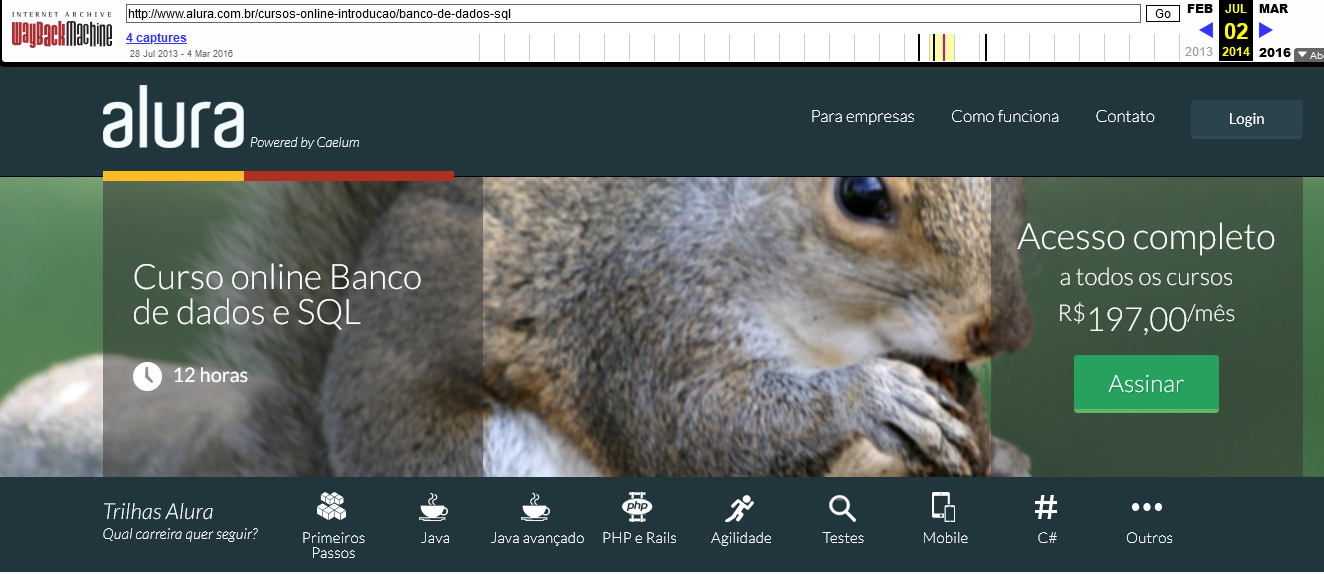

In [13]:
from IPython.display import display, Image
display(Image(filename='screen.png'))

In [81]:
# preço estimado mensal
precos = [197,197,197,197,75,75,75,75,85,85,85,85,99]
data['preco_esti_mensal'] = precos
data.head()

,ano,num_alunos,preco_esti_mensal
0,2011,29,197
1,2012,97,197
2,2013,375,197
3,2014,845,197
4,2015,1680,75


**Número de novos alunos mensais** - Dividir o número de alunos de cada ano pela quantidade de meses

In [82]:
# número de alunos mensais
data['novos_alunos_mensais'] = round(data['num_alunos']/12)
data.head()

,ano,num_alunos,preco_esti_mensal,novos_alunos_mensais
0,2011,29,197,2.0
1,2012,97,197,8.0
2,2013,375,197,31.0
3,2014,845,197,70.0
4,2015,1680,75,140.0


**Fatura estimada mensal** - Multiplicar o número de novos alunos mensais pelo valor da assinatura mensal

In [83]:
data['fatura_esti_mensal'] = data['novos_alunos_mensais']*data['preco_esti_mensal']
data.head()

,ano,num_alunos,preco_esti_mensal,novos_alunos_mensais,fatura_esti_mensal
0,2011,29,197,2.0,394.0
1,2012,97,197,8.0,1576.0
2,2013,375,197,31.0,6107.0
3,2014,845,197,70.0,13790.0
4,2015,1680,75,140.0,10500.0


**Fatura estimada anual** - Multiplicar o valor estimado da fatura mensal por 12 (meses)

In [84]:
data['fatura_esti_anual'] = data['fatura_esti_mensal']*12
data.head()

,ano,num_alunos,preco_esti_mensal,novos_alunos_mensais,fatura_esti_mensal,fatura_esti_anual
0,2011,29,197,2.0,394.0,4728.0
1,2012,97,197,8.0,1576.0,18912.0
2,2013,375,197,31.0,6107.0,73284.0
3,2014,845,197,70.0,13790.0,165480.0
4,2015,1680,75,140.0,10500.0,126000.0


<i>Importante ressaltar que também estamos fazendo uma premissa de que um aluno da Alura não cancela sua assinatura durante o ano</i>

Agora vamos estimar a quantidade real de alunos por ano, considerando a premissa de que os valores atuais que temos representam apenas 20% do total de alunos real em cada ano. Então temos um variável x como valor da estimativa real. Para isso, podemos usar:

x = (número atual * 100)/porcentagem de alunos que o valor atual representa

In [85]:
data['num_alunos_real'] = (data['num_alunos']*100)/20
data

,ano,num_alunos,preco_esti_mensal,novos_alunos_mensais,fatura_esti_mensal,fatura_esti_anual,num_alunos_real
0,2011,29,197,2.0,394.0,4728.0,145.0
1,2012,97,197,8.0,1576.0,18912.0,485.0
2,2013,375,197,31.0,6107.0,73284.0,1875.0
3,2014,845,197,70.0,13790.0,165480.0,4225.0
4,2015,1680,75,140.0,10500.0,126000.0,8400.0
5,2016,3856,75,321.0,24075.0,288900.0,19280.0
6,2017,5722,75,477.0,35775.0,429300.0,28610.0
7,2018,5592,75,466.0,34950.0,419400.0,27960.0
8,2019,6348,85,529.0,44965.0,539580.0,31740.0
9,2020,9962,85,830.0,70550.0,846600.0,49810.0


Estimativa da real quantidade de alunos anuais da Alura

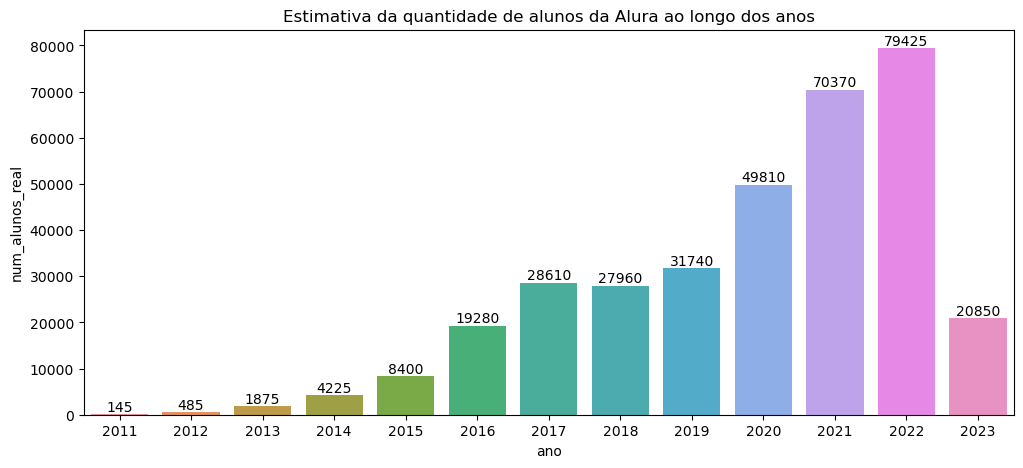

In [27]:
fig = plt.figure(figsize=(12,5))
ax = sns.barplot(data,x='ano',y='num_alunos_real')
ax.bar_label(ax.containers[0])
ax.set_title('Estimativa da quantidade de alunos da Alura ao longo dos anos')
fig.show()

Estimando as faturas reais mensais e anuais
- Uma vez que estimamos os números reais de alunos, agora vamos recalcular as faturas mensais e anuais

In [86]:
data['alunos_mensais_real'] = round(data['num_alunos_real']/12)
data['fatura_mensal_real'] = data['alunos_mensais_real']*data['preco_esti_mensal']*12
data['fatura_anual_real'] = data['fatura_mensal_real']*12

In [20]:
data

,ano,num_alunos,preco_esti_mensal,novos_alunos_mensais,fatura_esti_mensal,fatura_esti_anual,num_alunos_real,alunos_mensais_real,fatura_mensal_real,fatura_anual_real
0,2011,29,197,2.0,394.0,4728.0,145.0,12.0,28368.0,340416.0
1,2012,97,197,8.0,1576.0,18912.0,485.0,40.0,94560.0,1134720.0
2,2013,375,197,31.0,6107.0,73284.0,1875.0,156.0,368784.0,4425408.0
3,2014,845,197,70.0,13790.0,165480.0,4225.0,352.0,832128.0,9985536.0
4,2015,1680,75,140.0,10500.0,126000.0,8400.0,700.0,630000.0,7560000.0
5,2016,3856,75,321.0,24075.0,288900.0,19280.0,1607.0,1446300.0,17355600.0
6,2017,5722,75,477.0,35775.0,429300.0,28610.0,2384.0,2145600.0,25747200.0
7,2018,5592,75,466.0,34950.0,419400.0,27960.0,2330.0,2097000.0,25164000.0
8,2019,6348,85,529.0,44965.0,539580.0,31740.0,2645.0,2697900.0,32374800.0
9,2020,9962,85,830.0,70550.0,846600.0,49810.0,4151.0,4234020.0,50808240.0


Calculando um aumento percentual por ano
- Subtrair o valor atual pelo anterior
- Dividir o resultado pelo anterior
- Multiplicar por 100

Se a resposta final for negativa, então você tem uma redução percentual, onde
o novo número é menor que o número original. Caso contrário, você tem um
aumento percentual, onde o novo número é maior do que o número original.

In [87]:
values = [0]
faturas = data['fatura_anual_real'].values
for i,val in enumerate(faturas):
   if i+1<13:
     crescimento = (faturas[i+1]-val)/val
     values.append(round(crescimento*100))
     print(crescimento*100)

233.33333333333334
290.0
125.64102564102564
-24.2904937701892
129.57142857142858
48.35096453018046
-2.2651006711409396
28.655221745350502
56.93761814744801
41.26716453866538
12.875170532060027
-69.41745243194724


In [88]:
data['crescimento'] = values
data.head()

,ano,num_alunos,preco_esti_mensal,novos_alunos_mensais,fatura_esti_mensal,fatura_esti_anual,num_alunos_real,alunos_mensais_real,fatura_mensal_real,fatura_anual_real,crescimento
0,2011,29,197,2.0,394.0,4728.0,145.0,12.0,28368.0,340416.0,0
1,2012,97,197,8.0,1576.0,18912.0,485.0,40.0,94560.0,1134720.0,233
2,2013,375,197,31.0,6107.0,73284.0,1875.0,156.0,368784.0,4425408.0,290
3,2014,845,197,70.0,13790.0,165480.0,4225.0,352.0,832128.0,9985536.0,126
4,2015,1680,75,140.0,10500.0,126000.0,8400.0,700.0,630000.0,7560000.0,-24


Estimando as faturas anuais da Alura

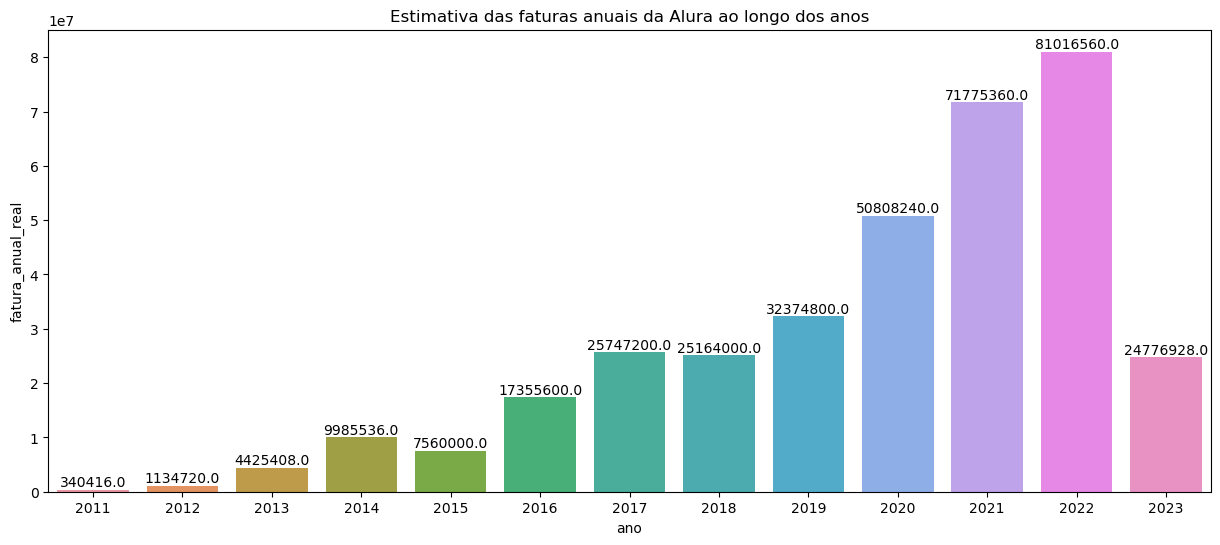

In [28]:
fig = plt.figure(figsize=(15,6))
ax = sns.barplot(data,x='ano',y='fatura_anual_real')
ax.bar_label(ax.containers[0],fmt=lambda x:f'{x}')
ax.set_title('Estimativa das faturas anuais da Alura ao longo dos anos')
fig.show()

Estimando o crescimento percentual anual da Alura

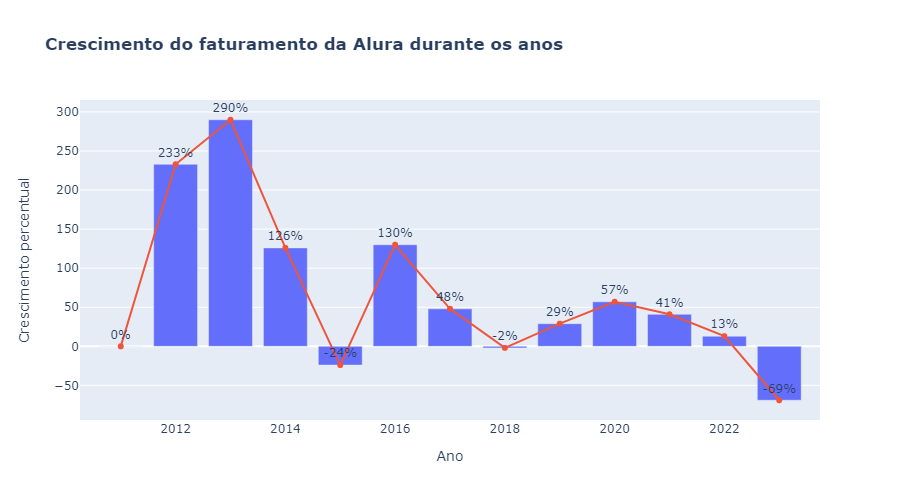

In [32]:
trace0 = go.Bar(
    x = data.ano,
    y = data.crescimento,
    name='Faturamento',
)

trace1 = go.Scatter(
    x = data.ano,
    y = data.crescimento,
    mode="lines+markers+text",
    text=data.crescimento,
    textposition="top center",
    name='Taxa de crescimento',
    texttemplate='%{text:.0f}%'
)



d = [trace0,trace1]

layout = go.Layout(title='<b>Crescimento do faturamento da Alura durante os anos</b>',barmode='stack',width=900, height=500)
fig = go.Figure(data=d,layout=layout)
fig.update_layout(showlegend=False,
    xaxis_title="Ano",
    yaxis_title="Crescimento percentual",
)
fig.show('png')

### Estimando o percentual de recompra

Recompra seria quando um aluno compra mais um ano de assinatura. Para isso, podemos utilizar o dado de 120 milhões de faturamento em 2021 para criar uma fórmula.

Na nossa estimativa, em 2021 deu  71775360 milhões, então ainda falta uma certa quantia para 120.

Vamos presumir que esse restante venha de recompra, assim ficando:

(120M - 71775360M)/120M


In [89]:
data['taxa_recompra'] = ((120000000 - 71775360)/120000000)
data['taxa_recompra'].head(1)

0    0.401872
Name: taxa_recompra, dtype: float64

O percentual de recompra foi de 40%, ou seja, 40% dos alunos da Alura possivelmente recompram os cursos

Com base nisso, considerando a recompra, podemos recalcular a fatura anual da Alura

Vamos dividir a fatura antes encontrada por 1 - o percentual de recompra (0.40), assim chegando-se no valor mais próximo da fatura

In [90]:
data['fatura_anual_real2'] = data['fatura_anual_real']/(1-0.40)
data.head()

,ano,num_alunos,preco_esti_mensal,novos_alunos_mensais,fatura_esti_mensal,fatura_esti_anual,num_alunos_real,alunos_mensais_real,fatura_mensal_real,fatura_anual_real,crescimento,taxa_recompra,fatura_anual_real2
0,2011,29,197,2.0,394.0,4728.0,145.0,12.0,28368.0,340416.0,0,0.401872,567360.0
1,2012,97,197,8.0,1576.0,18912.0,485.0,40.0,94560.0,1134720.0,233,0.401872,1891200.0
2,2013,375,197,31.0,6107.0,73284.0,1875.0,156.0,368784.0,4425408.0,290,0.401872,7375680.0
3,2014,845,197,70.0,13790.0,165480.0,4225.0,352.0,832128.0,9985536.0,126,0.401872,16642560.0
4,2015,1680,75,140.0,10500.0,126000.0,8400.0,700.0,630000.0,7560000.0,-24,0.401872,12600000.0


In [129]:
values = [0]
faturas = data['fatura_anual_real2'].values
for i,val in enumerate(faturas):
   if i+1<13:
     crescimento = (faturas[i+1]-val)/val
     values.append(round(crescimento*100))
data['crescimento2'] = values

### Estimativa final da fatura e seu crescimento anual na Alura

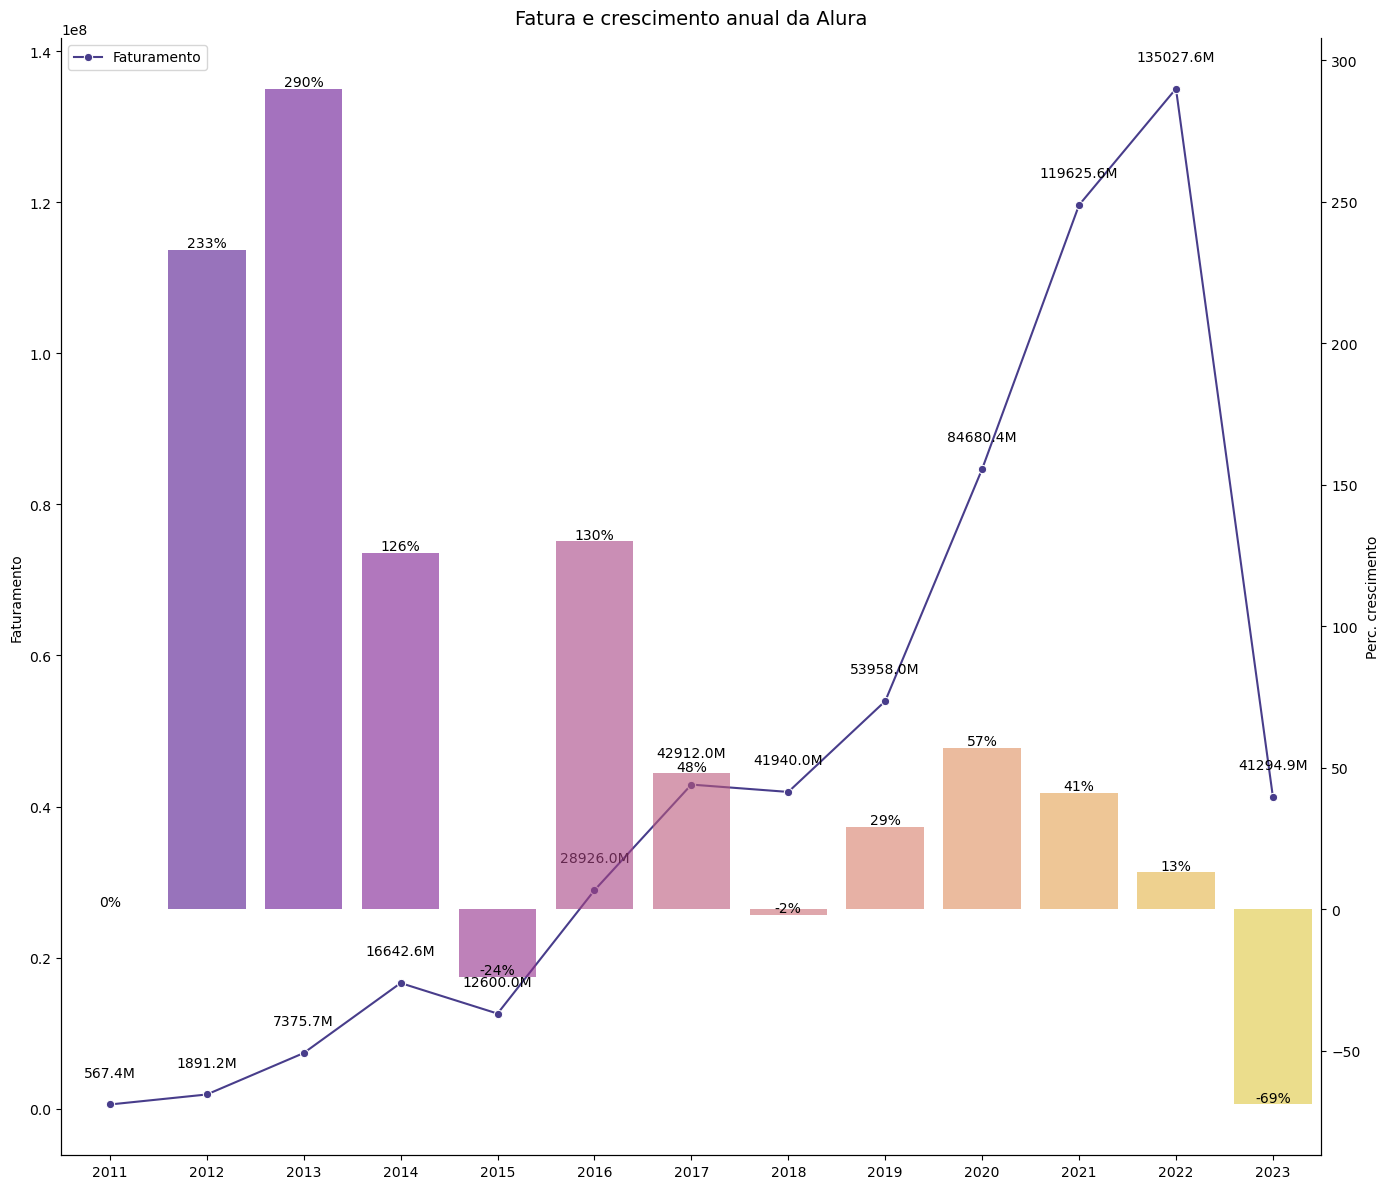

In [167]:
fig, ax1 = plt.subplots(figsize=(14,12))

sns.lineplot(data = data['fatura_anual_real2'], marker='o', sort = False, ax=ax1, color='darkslateblue',label='Faturamento')
ax2 = ax1.twinx()

sns.barplot(data = data, x='ano', y='crescimento2', alpha=0.6, ax=ax2, palette='plasma')

ax1.set_title('Fatura e crescimento anual da Alura', size=14, pad=10)


ax2.set_ylabel('Perc. crescimento')

for x, y in data.fatura_anual_real2.items():
    ax1.annotate(str(round(y/1000, 1))+'M', xy=(x, y), textcoords='offset points', xytext=(0, 20),
                ha='center')

for x, y in data.crescimento.items():
    ax2.annotate(str(round(y))+'%', xy=(x, y), textcoords='offset points', xytext=(0, 2),
                ha='center')

ax1.set_ylabel('Faturamento')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.legend(loc='upper left')

plt.tight_layout()
fig.show()

In [170]:
#atividades_geral.to_csv('atividades_geral.csv',index=False)